### Materialy do zajec: Regresja logistyczna 1: "implementacja w numpy"

**Ustawiamy ziarno losowe**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(100) #zierno losowe - wyniki za każdym razem beda takie same  (popularne: 2022, 0, 42)

### Przybliżamy wartość równaniem:

\begin{align*}
\hat y = \frac{1}{1 + e^{-z}}
\end{align*}

\begin{align*}
z = wx + b
\end{align*}

\begin{align*}
w = w - \alpha * dw
\end{align*}
\begin{align*}
b = b - \alpha * db
\end{align*}

#obliczanie spadku gradientu

### Czym jest dw i db?

\begin{align*}
\alpha = krok
\end{align*}

\begin{align*}
dw = \frac{dJ}{dw} = \frac{1}{N} \sum x_{i}(\hat y_{i}-y_{i})
\end{align*}

\begin{align*}
db = \frac{dJ}{db} = \frac{1}{N} \sum (\hat y_{i} - y_{i})
\end{align*}

### Funkcja kosztu

\begin{align*}
J(w,b) = \frac{1}{N} \sum_{i=1}^{n} \left[y_{i} log(\hat y_{i}) + (1-y_{i})log(1- \hat y_{i})\right]
\end{align*}

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/78/Petal-sepal.jpg/330px-Petal-sepal.jpg)

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
(iris.target != 0) #przewidujemy, czy dany kwiat jest setosa

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [6]:
(iris.target != 0) * 1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [9]:
iris.data[:, :2]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [7]:
x = iris.data[:, :2]
y = (iris.target != 0) * 1

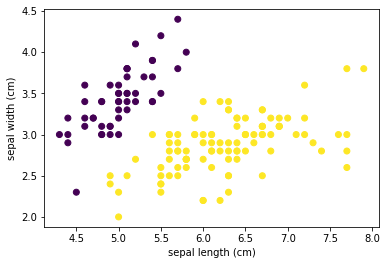

In [10]:
plt.scatter(x[:,0], x[:,1], c = y)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

## Sigmoid

In [11]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [12]:
np.round(sigmoid(0), 4)

0.5

\begin{align*}
z = wx + b
\end{align*}

\begin{align*}
\hat y = \frac{1}{1 + e^{-z}}
\end{align*}

<div>
<img src="https://hvidberrrg.github.io/deep_learning/activation_functions/assets/sigmoid_function.png" width="300"/>
</div>

Zwraca prawdopodobienstwo przynaleznosci do klasy na podstawie cech, wag, biasu

In [14]:
np.linspace(0, 1, 1000)[1:-1]

array([0.001001  , 0.002002  , 0.003003  , 0.004004  , 0.00500501,
       0.00600601, 0.00700701, 0.00800801, 0.00900901, 0.01001001,
       0.01101101, 0.01201201, 0.01301301, 0.01401401, 0.01501502,
       0.01601602, 0.01701702, 0.01801802, 0.01901902, 0.02002002,
       0.02102102, 0.02202202, 0.02302302, 0.02402402, 0.02502503,
       0.02602603, 0.02702703, 0.02802803, 0.02902903, 0.03003003,
       0.03103103, 0.03203203, 0.03303303, 0.03403403, 0.03503504,
       0.03603604, 0.03703704, 0.03803804, 0.03903904, 0.04004004,
       0.04104104, 0.04204204, 0.04304304, 0.04404404, 0.04504505,
       0.04604605, 0.04704705, 0.04804805, 0.04904905, 0.05005005,
       0.05105105, 0.05205205, 0.05305305, 0.05405405, 0.05505506,
       0.05605606, 0.05705706, 0.05805806, 0.05905906, 0.06006006,
       0.06106106, 0.06206206, 0.06306306, 0.06406406, 0.06506507,
       0.06606607, 0.06706707, 0.06806807, 0.06906907, 0.07007007,
       0.07107107, 0.07207207, 0.07307307, 0.07407407, 0.07507

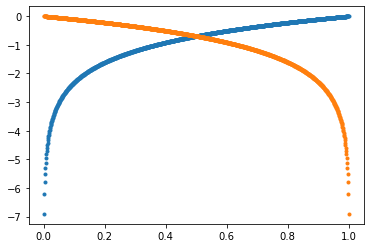

In [13]:
space = np.linspace(0, 1, 1000)[1:-1]
plt.clf()
plt.plot(space, np.log(space), '.')
plt.plot(space, np.log(1-space), '.')

In [15]:
1-space

array([0.998999  , 0.997998  , 0.996997  , 0.995996  , 0.99499499,
       0.99399399, 0.99299299, 0.99199199, 0.99099099, 0.98998999,
       0.98898899, 0.98798799, 0.98698699, 0.98598599, 0.98498498,
       0.98398398, 0.98298298, 0.98198198, 0.98098098, 0.97997998,
       0.97897898, 0.97797798, 0.97697698, 0.97597598, 0.97497497,
       0.97397397, 0.97297297, 0.97197197, 0.97097097, 0.96996997,
       0.96896897, 0.96796797, 0.96696697, 0.96596597, 0.96496496,
       0.96396396, 0.96296296, 0.96196196, 0.96096096, 0.95995996,
       0.95895896, 0.95795796, 0.95695696, 0.95595596, 0.95495495,
       0.95395395, 0.95295295, 0.95195195, 0.95095095, 0.94994995,
       0.94894895, 0.94794795, 0.94694695, 0.94594595, 0.94494494,
       0.94394394, 0.94294294, 0.94194194, 0.94094094, 0.93993994,
       0.93893894, 0.93793794, 0.93693694, 0.93593594, 0.93493493,
       0.93393393, 0.93293293, 0.93193193, 0.93093093, 0.92992993,
       0.92892893, 0.92792793, 0.92692693, 0.92592593, 0.92492

## Funkcja kosztu

\begin{align*}
J(w,b) = - \frac{1}{N} \sum_{i=1}^{n} \left[y_{i} log(\hat y_{i}) + (1-y_{i})log(1- \hat y_{i})\right]
\end{align*}

Dla kazdej probki oblicza sie prawdopodobiennstwo przynaleznosci do klasy "1", porownujemy z klasa oryginalna i sprawdzamy na ile predykcja jest trafna

In [16]:
def koszt(pred, y): #y oznacza klase prawdziwa, zgodna z labelem z oryginalnych danych
    return (-y * np.log(pred) - (1 - y) * np.log(1 - pred)).mean()

### Czym jest dw i db?

\begin{align*}
w = w - \alpha * dw
\end{align*}
\begin{align*}
b = b - \alpha * db
\end{align*}

\begin{align*}
\alpha = krok
\end{align*}

\begin{align*}
dw = \frac{dJ}{dw} = \frac{1}{N} \sum x_{i}(\hat y_{i}-y_{i})
\end{align*}

\begin{align*}
db = \frac{dJ}{db} = \frac{1}{N} \sum (\hat y_{i} - y_{i})
\end{align*}

In [17]:
## https://pl.wikipedia.org/wiki/Mno%C5%BCenie_macierzy

## http://optymalizacja.w8.pl/NajszybszegoSpadku.html

#lr - learning rate - szybkosc uczenia (mozemy sprawic ze model bedzie sie szybciej uczyl z iteracjami)

def spadek_gradientu(x, y, lr, iteracje): #gradient descent
    liczba_cech = x.shape[1]
    bias = 0 # z taka wartoscia startujemy na poczatek
    wagi = np.zeros(liczba_cech) # kazda cecha ma swoja wage
    
    for n in range(iteracje):
        Z = np.dot(wagi, np.transpose(x)) + bias # wagi * transponowana macierz cech + bias 
        pstwa_klas = sigmoid(Z) # prawdopodobienstwo przynaleznosci do danej klasy dla probki
        dZ = pstwa_klas - y
        
        dW = 1/len(y) * np.dot(np.transpose(x), dZ) 
        dB = 1/len(y) * np.sum(dZ)
        
        wagi = wagi - lr * dW # per iteracje: update wag i biasow
        bias = bias - lr * dB

        if n % 40 == 0:
            print("Koszt : ", koszt(pstwa_klas, y))
            
    return wagi, bias

In [24]:
wagi, bias = spadek_gradientu(x, y, 1, 200)

Koszt :  0.6931471805599454
Koszt :  0.2270846637627842
Koszt :  0.05424298839446198
Koszt :  0.051200630360481524
Koszt :  0.04879338986097142


In [19]:
wagi, bias

(array([ 4.52969675, -7.41815986]), -1.3194910928022163)

## Prawdopodobienstwa

In [25]:
Z = np.dot(wagi, np.transpose(x)) + bias

In [26]:
Z

array([-4.1815972 , -1.37845662, -3.76802794, -3.47918163, -5.37638286,
       -5.78995212, -5.70462959, -3.89275089, -2.90148901, -2.12027261,
       -4.30632015, -4.79869024, -1.83142629, -4.09627467, -4.71988941,
       -8.14012303, -5.78995212, -4.1815972 , -3.68922711, -6.40704516,
       -2.08087219, -5.66522917, -7.18826156, -2.69796523, -4.79869024,
       -0.92548695, -3.89275089, -3.72862753, -2.98681154, -3.76802794,
       -2.57324228, -2.08087219, -8.17952344, -7.5624304 , -2.12027261,
       -2.40911892, -2.3697185 , -5.82935254, -3.64330499, -3.43978121,
       -4.63456688,  2.00237658, -5.12693696, -4.63456688, -6.40704516,
       -1.83142629, -6.40704516, -4.22099762, -4.75928982, -3.1509349 ,
        6.65027457,  3.93245653,  6.93912089,  6.53207333,  7.35269015,
        3.72893275,  2.73767087,  3.0724393 ,  7.06384383,  2.20590036,
        6.49267292,  3.15124013,  9.53873769,  4.79899546,  2.53414709,
        6.03318154,  1.7923311 ,  4.92371841, 10.44467704,  5.50

In [27]:
prawdopodobienstwa_klas = sigmoid(Z)

In [28]:
np.round(prawdopodobienstwa_klas, 3)

array([0.015, 0.201, 0.023, 0.03 , 0.005, 0.003, 0.003, 0.02 , 0.052,
       0.107, 0.013, 0.008, 0.138, 0.016, 0.009, 0.   , 0.003, 0.015,
       0.024, 0.002, 0.111, 0.003, 0.001, 0.063, 0.008, 0.284, 0.02 ,
       0.023, 0.048, 0.023, 0.071, 0.111, 0.   , 0.001, 0.107, 0.082,
       0.086, 0.003, 0.025, 0.031, 0.01 , 0.881, 0.006, 0.01 , 0.002,
       0.138, 0.002, 0.014, 0.008, 0.041, 0.999, 0.981, 0.999, 0.999,
       0.999, 0.977, 0.939, 0.956, 0.999, 0.901, 0.998, 0.959, 1.   ,
       0.992, 0.927, 0.998, 0.857, 0.993, 1.   , 0.996, 0.841, 0.996,
       1.   , 0.996, 0.998, 0.998, 1.   , 0.999, 0.987, 0.995, 0.997,
       0.997, 0.993, 0.997, 0.708, 0.654, 0.998, 1.   , 0.857, 0.994,
       0.987, 0.983, 0.997, 0.986, 0.982, 0.904, 0.952, 0.995, 0.962,
       0.977, 0.939, 0.993, 1.   , 0.997, 0.997, 1.   , 0.911, 1.   ,
       1.   , 0.99 , 0.988, 1.   , 0.999, 0.997, 0.985, 0.981, 0.997,
       0.995, 1.   , 1.   , 0.998, 0.964, 1.   , 0.999, 0.99 , 0.999,
       0.998, 0.983,

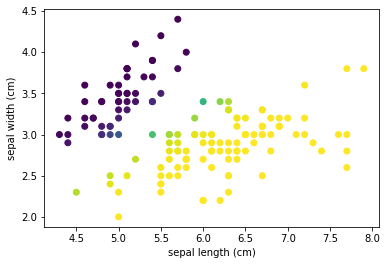

In [29]:
plt.scatter(x[:,0], x[:,1], c = prawdopodobienstwa_klas)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

## Predykcja

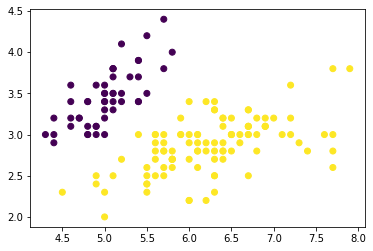

In [30]:
predykcja = []
for i in range(0, len(prawdopodobienstwa_klas)):
    if prawdopodobienstwa_klas[i] > 0.5:
        predykcja.append(1)
    else:
        predykcja.append(0)
        
plt.scatter(x[:,0], x[:,1], c = predykcja)

## Prawdziwe labele

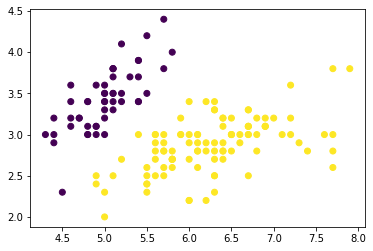

In [31]:
plt.scatter(x[:,0], x[:,1], c = y)